In [15]:
%pylab inline
import pandas as pd
import umap

Populating the interactive namespace from numpy and matplotlib


/gpfs/commons/home/schoudhary/software/anaconda3/envs/schpf/lib/python3.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [16]:
cell_scores = pd.read_csv("../data/pbmc3k_counts_prep_train_score/cell_score.txt", header=None, sep="\t")
cell_scores.shape

(2700, 13)

In [17]:
cell_scores

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000927,0.275074,0.298336,0.235938,0.589074,0.000913,1.185467,0.017218,0.039240,0.000809,0.662670,1.030958,0.559968
1,0.319321,0.638783,0.020260,0.051550,0.106546,2.344926,0.318203,0.149437,0.000345,0.051781,0.526701,0.000452,0.370144
2,0.305121,0.468975,0.027962,0.916680,1.029906,0.000617,1.159876,0.000792,0.013803,0.064295,0.184995,0.724370,0.000268
3,0.693069,0.217138,0.043638,0.135212,0.000482,0.000700,0.031575,1.099877,0.723599,1.609046,0.141831,0.079920,0.121288
4,0.001411,0.954939,2.304626,0.001260,0.083050,0.001413,1.257544,0.049808,0.236360,0.001245,0.000808,0.001656,0.000624
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,0.255775,0.486467,0.015795,0.045800,0.000382,0.132730,0.153902,0.964627,2.348172,0.000491,0.044521,0.190239,0.259016
2696,0.000544,2.132950,0.000964,0.361880,0.009836,1.304122,0.608784,0.000667,0.000439,0.072569,0.000305,0.129631,0.275326
2697,0.050756,0.160028,0.001808,0.384001,0.000704,3.533029,0.000912,0.001266,0.034113,0.062268,0.000619,0.666222,0.000449
2698,0.001790,0.002095,0.003274,0.001538,0.635366,3.071234,0.001615,0.350075,0.001426,0.149462,0.000986,0.673864,0.000724


In [18]:
reducer = umap.UMAP(metric='cosine', n_neighbors=30, )
embedding = reducer.fit_transform(cell_scores)
embedding_df = pd.DataFrame(embedding, columns=["0", "1"])
embedding_df

,0,1
0,-2.032237,-0.014529
1,2.041424,17.691858
2,-2.823821,-1.254042
3,16.194624,3.757219
4,-3.119784,4.119405
...,...,...
2695,16.916712,6.317258
2696,2.195585,16.105976
2697,2.690191,18.990200
2698,2.813909,19.039862


In [19]:
import proplot as plot
from palettable.colorbrewer.qualitative import Paired_12

In [20]:
sct_clusters = pd.read_csv("../../single-cell-playground//data/pbmc3k/processed_for_scvi/SCT_seuratclusters.tsv", sep="\t") 
all_clusters = sorted(sct_clusters.seurat_clusters.unique())
cluster_colors = dict(zip(all_clusters, sorted(Paired_12.hex_colors)))
sct_clusters['color'] = sct_clusters.seurat_clusters.map(lambda x: cluster_colors[x])


In [21]:
all_clusters

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

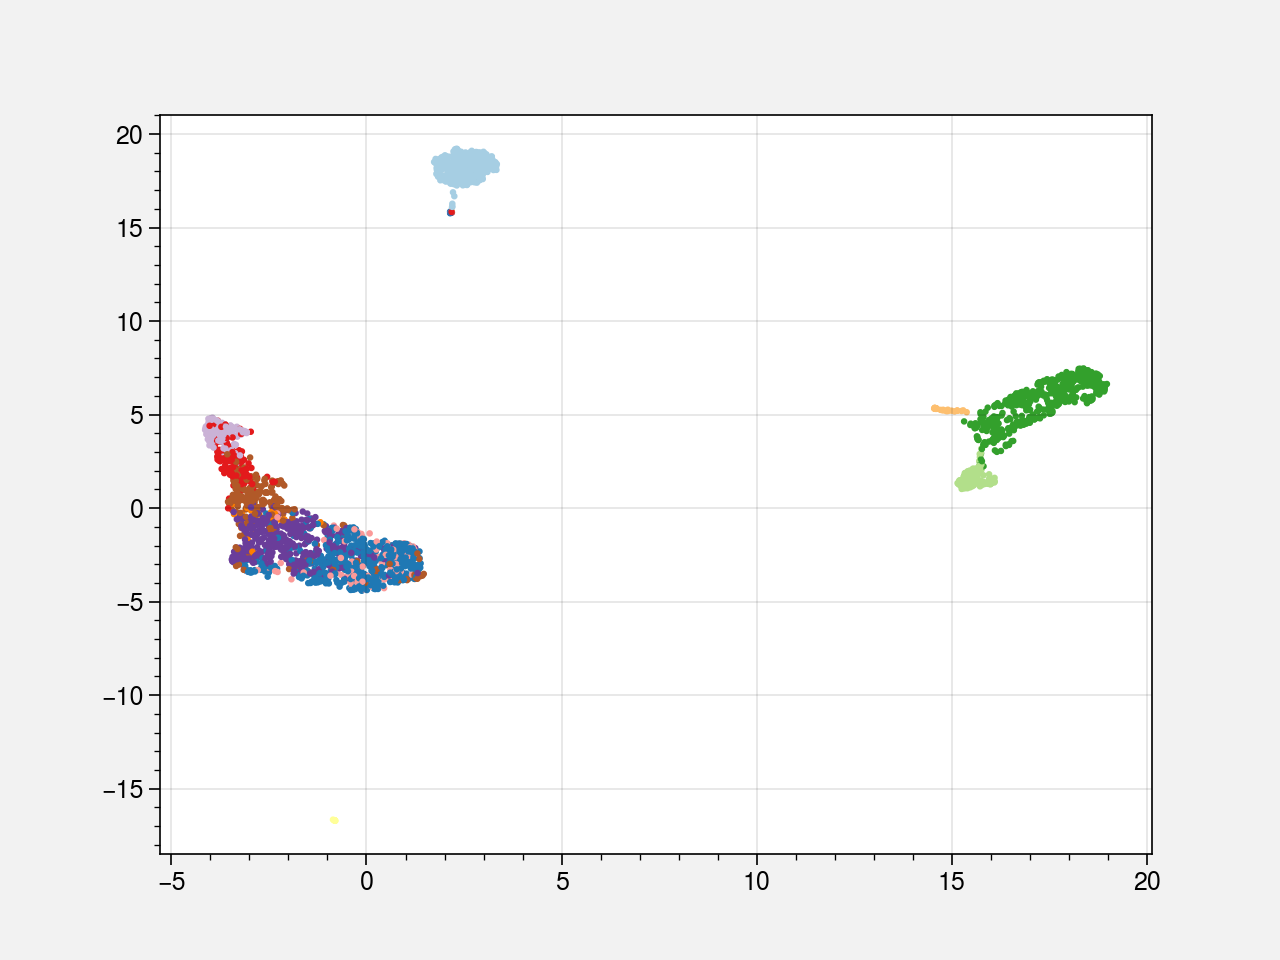

In [22]:
plt.scatter(embedding_df["0"], embedding_df["1"], color= sct_clusters['color'], s=3)